In [2]:
import math
import os
import pandas
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#导入csv文件
filename = "beijinghousing_2018.csv"
pf = pandas.read_csv(filename)

#辅助函数
dirname = "picture"


def draw(x, y, var):
    """绘制真实数据的散点图和模型曲线"""
    if not os.path.exists(dirname):
        os.mkdir(dirname)
    y_hat = var[0] * x + var[1]
    plt.clf()  #重置画布
    plt.xlabel(x.name)
    plt.ylabel("TotalPrice")
    title = "TotalPrice" + "--" + x.name + " Linear Model"
    plt.title(title)
    plt.scatter(x, y)
    plt.plot(x, y_hat)
    plt.savefig(dirname + "\\" + title + '.png', bbox_inches='tight')


def floor_deal(raw):
    tab, num = raw.split(" ")
    num = int(num)
    return num

In [4]:
os.path.exists(dirname)

True

In [3]:
#数据处理，将数据分成训练组和测试组
print(pf.columns)
pf["tradeTime"] = pf["tradeTime"].map(lambda x: x[7:])
pf["houseType"] = pf["livingRoom"] + pf["drawingRoom"] + pf["kitchen"] + pf["bathRoom"]
pf["floor"] = pf["floor"].map(lambda x: floor_deal(x))
print(pf["tradeTime"].unique())

#划分数据用途
pf_train = pf[pf["数据集类型"] == "训练"]
pf_test = pf[pf["数据集类型"] == "测试"]

Index(['tradeTime', 'DOM', 'followers', 'totalPrice', 'price', 'square',
       'livingRoom', 'drawingRoom', 'kitchen', 'bathRoom', 'floor',
       'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', '数据集类型'],
      dtype='object')
['1' '3' '2' '22' '24' '19' '20' '28' '26']


In [4]:
#计算线性模型、检验和预测的类
class LinearMod:
    def __init__(self, x, y):
        self.x_train = x
        self.y_train = y

    def model(self):
        """一元线性回归拟合，依次返回斜率，截距，r 值，p 值，标准误差"""
        return st.linregress(self.x_train, self.y_train)

    def r2(self):
        """计算模型的可决系数R方"""
        return self.model()[2]**2

    def t(self):
        """计算模型自相关系数，返回p值"""
        return self.model()[3]

    def rmse(self, x_test, y_test):
        """计算预测数据与真实情况的误差，返回均方根"""
        y_hat = self.predict(x_test)
        se = math.sqrt(((y_hat - y_test) ** 2).sum() / len(y_hat))
        return se

    def predict(self, x_test):
        """根据模型参数和新数据预测值"""
        var = self.model()
        y_hat = var[0] * x_test + var[1]
        return y_hat


tradeTime
DOM
square
houseType
floor
ladderRatio
communityAverage


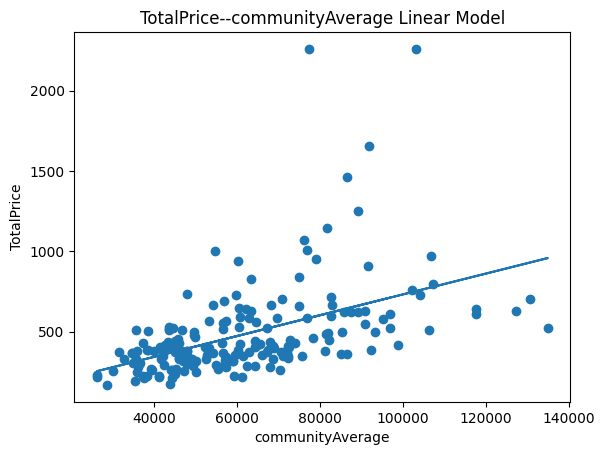

In [6]:
#计算所有变量的线性模型
#待拟合的变量
index_list = ["tradeTime", 'DOM', 'square', 'houseType', "floor", 'ladderRatio', 'communityAverage']
#初始化y值
y_train = pf_train["totalPrice"]
y_test = pf_test["totalPrice"]
results = []

for index in index_list:
    print(index)
    x_train = pf_train[index]
    x_test = pf_test[index]
    x_train = x_train.astype(np.float32)
    x_test = x_test.astype(np.float32)

    test = LinearMod(x_train, y_train)
    var = test.model()
    draw(x_train, y_train, var)
    result = [index,var[0],var[1]]
    result = result + [test.r2(), test.t(), test.rmse(x_test, y_test)]
    results.append(result)

In [7]:
#将所有变量计算线性模型后的数据写进表格
import openpyxl

wb = openpyxl.open("E:\\CS\\UniversityHomework\\data.xlsx")
ws = wb.worksheets[0]
ncol = len(results)
nrow = len(results[0])
for i in range(1, ncol+1):
    for j in range(1, nrow+1):
        ws.cell(j,i, results[i - 1][j - 1])
wb.save("E:\\CS\\UniversityHomework\\data.xlsx")